In [4]:
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection as ms

In [99]:
# X_train, y_train, X_test, y_test  no need to split data in case of cross validation it doies this automatically

iris = load_iris()
X = iris.data
y = iris.target
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [17]:
knn = KNeighborsClassifier(n_neighbors= 5)
score = ms.cross_val_score(knn, X, y, cv=10, scoring ='accuracy')
score = score.mean()
print(score)

0.9666666666666668


In [42]:
k_score = {}
k_scores = []
for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors= k)
    score = ms.cross_val_score(knn, X, y, cv=10, scoring ='accuracy')
    score = score.mean()
    k_score[k] = score
    k_scores.append(score)

In [19]:
print(k_score)

{1: 0.96, 2: 0.9533333333333334, 3: 0.9666666666666666, 4: 0.9666666666666666, 5: 0.9666666666666668, 6: 0.9666666666666668, 7: 0.9666666666666668, 8: 0.9666666666666668, 9: 0.9733333333333334, 10: 0.9666666666666668, 11: 0.9666666666666668, 12: 0.9733333333333334, 13: 0.9800000000000001, 14: 0.9733333333333334, 15: 0.9733333333333334, 16: 0.9733333333333334, 17: 0.9733333333333334, 18: 0.9800000000000001, 19: 0.9733333333333334, 20: 0.9800000000000001, 21: 0.9666666666666666, 22: 0.9666666666666666, 23: 0.9733333333333334, 24: 0.96, 25: 0.9666666666666666, 26: 0.96, 27: 0.9666666666666666, 28: 0.9533333333333334, 29: 0.9533333333333334, 30: 0.9533333333333334}


In [40]:
x = 0
max_acc = 0
for k in k_score:
    if max_acc<=k_score[k]: # the value of k should be maximum as higher values of k produce less complex mode;
        max_acc = k_score[k]
        x = k

print(x)
print(max_acc)   # theoritical way to find the max_acc and the value of k

20
0.9800000000000001


Text(0, 0.5, 'accuracy')

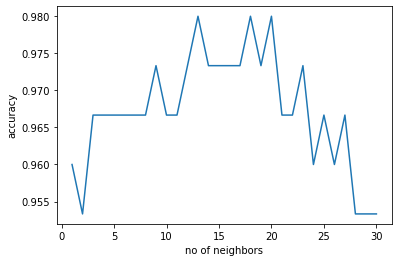

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

k = range(1,31)
plt.plot(k, k_scores)
plt.xlabel("no of neighbors")
plt.ylabel("accuracy")           # graphical method to find maximum accuracy

In [ ]:
# accuracy can only be measured in case of classification problems in case of prediction problems use mean squared error

 #  Grid Search CV

In [50]:
k = range(1 ,31)
param_grid = dict(n_neighbors = k)
print(param_grid)

range(1, 31)
{'n_neighbors': range(1, 31)}


In [51]:
grid = ms.GridSearchCV(knn, param_grid, cv=10, scoring="accuracy" ) #set n_jobs =-1
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=30, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None, param_grid={'n_neighbors': range(1, 31)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [55]:
grid.cv_results_

{'mean_fit_time': array([0.00074377, 0.00025094, 0.00061929, 0.00090394, 0.00319996,
        0.        , 0.00042942, 0.00040007, 0.00010266, 0.00251284,
        0.00286183, 0.00296957, 0.00050898, 0.00030653, 0.00080006,
        0.00062809, 0.00168374, 0.00010295, 0.00077538, 0.0015991 ,
        0.00034142, 0.00054073, 0.00049376, 0.00096359, 0.0025589 ,
        0.00063982, 0.00039549, 0.0012526 , 0.00107841, 0.0020282 ]),
 'std_fit_time': array([0.00126085, 0.00040257, 0.00123753, 0.00157858, 0.00159998,
        0.        , 0.00119318, 0.0012002 , 0.00030799, 0.00186251,
        0.00209636, 0.00175062, 0.00122179, 0.00046861, 0.00160012,
        0.00128103, 0.00187699, 0.00030885, 0.00118121, 0.0017014 ,
        0.00068681, 0.00055355, 0.00053291, 0.00118052, 0.00173314,
        0.00129608, 0.00065304, 0.00161365, 0.00124863, 0.00154849]),
 'mean_score_time': array([0.00149622, 0.00376287, 0.00293159, 0.00245748, 0.00094995,
        0.00400348, 0.00307226, 0.00359609, 0.00383229, 0.00

In [60]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_index_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')
12


#  Searching Multiple Parameters simultaneously
exhaustive grid search

In [93]:
metric_options = ['minkowski', 'wminkowski']
weight_options = ['uniform', 'distance']
param_grid = dict(weights = weight_options, n_neighbors=k)

In [96]:
grid = ms.GridSearchCV(knn, param_grid, cv=10, scoring="accuracy" ) #set n_jobs =-1
grid.fit(X,y)
grid.cv_results_

{'mean_fit_time': array([0.00048394, 0.00108731, 0.00090258, 0.00039997, 0.00058489,
        0.00079958, 0.00199997, 0.00080378, 0.00171659, 0.00052528,
        0.00130885, 0.00121784, 0.00091448, 0.0005053 , 0.00080004,
        0.0005089 , 0.00079925, 0.00048151, 0.00080349, 0.00120003,
        0.00040002, 0.00080879, 0.00084181, 0.00160356, 0.00080004,
        0.00079925, 0.0024298 , 0.00120051, 0.00141881, 0.00121231,
        0.00040064, 0.00010271, 0.00021732, 0.00165565, 0.00080001,
        0.00096564, 0.00123711, 0.00018277, 0.00040138, 0.00056946,
        0.00061784, 0.00090282, 0.00083387, 0.00050075, 0.0008002 ,
        0.00119956, 0.        , 0.00081155, 0.00161808, 0.00083454,
        0.        , 0.00010331, 0.00125787, 0.00031531, 0.00080009,
        0.00050797, 0.0003994 , 0.00120001, 0.        , 0.00080001]),
 'std_fit_time': array([0.00048185, 0.00166373, 0.00159556, 0.00119991, 0.00131652,
        0.00159917, 0.00199997, 0.00160757, 0.00191478, 0.00119339,
        0.001

In [95]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

print(grid.best_index_)

0.98
{'n_neighbors': 13, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')
24


In [97]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X,y)  # after the entire process of train test split now fit the data using all the available data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [100]:
knn.predict([[3,5,4,2]])

array([1])